In [1]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
    
# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2024-01-25 00:49:15--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4005:814::201b, 2404:6800:4005:813::201b, 2404:6800:4005:815::201b, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4005:814::201b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191,38M  26,2MB/s    in 8,6s    

2024-01-25 00:49:24 (22,4 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2024-01-25 00:49:24--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4005:813::201b, 2404:6800:4005:814::201b, 2404:6800:4005:815::201b, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4005:813::201b|:443... connected.
HTTP request sent, awaiting res

In [3]:
import zipfile

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()

In [1]:
import os

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock05ck01-006.png', 'rock03-077.png', 'rock06ck02-083.png', 'rock01-009.png', 'rock05ck01-097.png', 'rock03-026.png', 'rock07-k03-010.png', 'rock05ck01-029.png', 'rock03-111.png', 'rock05ck01-062.png']
['paper04-000.png', 'paper06-105.png', 'paper02-038.png', 'paper01-086.png', 'paper06-096.png', 'paper05-001.png', 'paper06-063.png', 'paper01-001.png', 'paper01-018.png', 'paper06-032.png']
['testscissors03-027.png', 'testscissors01-048.png', 'scissors04-075.png', 'scissors04-027.png', 'scissors03-029.png', 'testscissors03-019.png', 'scissors03-073.png', 'testscissors01-040.png', 'scissors02-059.png', 'testscissors03-024.png']


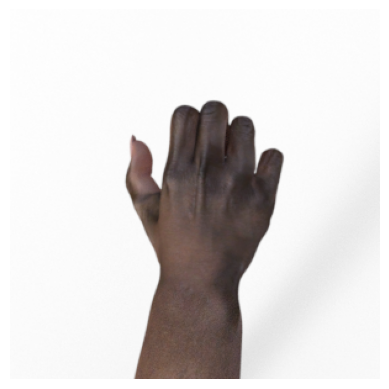

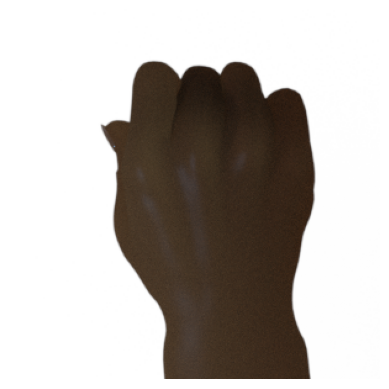

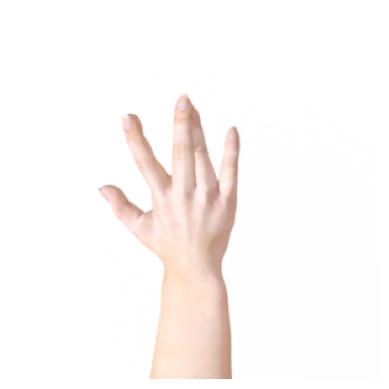

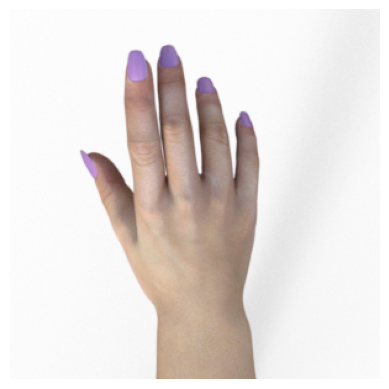

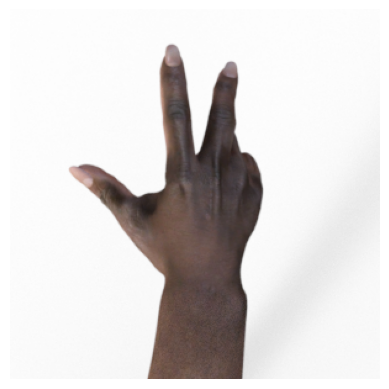

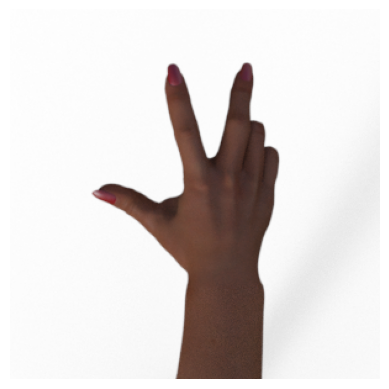

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

2024-01-25 00:52:16.105661: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-25 00:52:16.105808: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-25 00:52:16.124966: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-25 00:52:16.125104: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-25 00:52:16.125201: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

In [5]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tmp/rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [7]:
# Train the model
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25


2024-01-25 00:52:45.233122: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8204
2024-01-25 00:52:47.220786: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


20/20 [==============================] - 14s 499ms/step - loss: 1.3921 - accuracy: 0.3377 - val_loss: 1.0970 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 9s 457ms/step - loss: 1.0772 - accuracy: 0.3913 - val_loss: 0.9310 - val_accuracy: 0.5323
Epoch 3/25
20/20 [==============================] - 9s 457ms/step - loss: 1.0159 - accuracy: 0.4917 - val_loss: 0.8380 - val_accuracy: 0.5054
Epoch 4/25
20/20 [==============================] - 9s 460ms/step - loss: 1.3106 - accuracy: 0.5254 - val_loss: 0.7818 - val_accuracy: 0.4624
Epoch 5/25
20/20 [==============================] - 9s 461ms/step - loss: 0.8687 - accuracy: 0.6524 - val_loss: 0.5256 - val_accuracy: 0.7500
Epoch 6/25
20/20 [==============================] - 9s 460ms/step - loss: 0.8048 - accuracy: 0.6575 - val_loss: 0.4481 - val_accuracy: 0.7608
Epoch 7/25
20/20 [==============================] - 9s 459ms/step - loss: 0.5766 - accuracy: 0.7599 - val_loss: 0.1333 - val_accuracy: 1.0000
Epoch 8/25
20/20

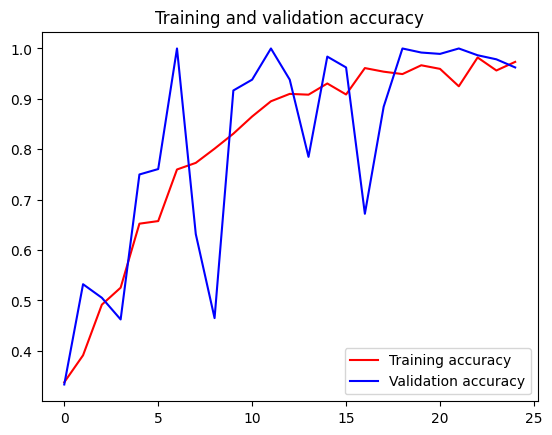

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [10]:
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

base_dir = "/home/gom/Workspace/tf2/tmp/rps/"
images = os.listdir(base_dir)

print(images)

for i in images:
    print()
    # predicting images
    path = os.path.join(base_dir,i)
    img = load_img(path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(path)
    print(classes)

['testrock01-09.png', 'testpaper01-17.png', 'testscissors01-24.png']

/home/gom/Workspace/tf2/tmp/rps/testrock01-09.png
[[0. 1. 0.]]

/home/gom/Workspace/tf2/tmp/rps/testpaper01-17.png
[[1. 0. 0.]]

/home/gom/Workspace/tf2/tmp/rps/testscissors01-24.png
[[0. 0. 1.]]
